ЗАДАНИЕ: Используя предобученную модель VGG и набор данных Cyfar-10 создать классификатор дляраспознования собак и кошек. Классификатор реализовать с использованием Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# загружаем датасет cifar10
(x_trn, y_trn), (x_tst, y_tst) = cifar10.load_data()

In [ ]:
# получаем из датасета данные по кошкам и собакам
cat_indices_train = np.where((y_trn == 3))[0]
cat_indices_test = np.where((y_tst == 3))[0]
dog_indices_train = np.where((y_trn == 5))[0]
dog_indices_test = np.where((y_tst == 5))[0]

In [ ]:
# cобъединяем все полученные картинки с животными в один датасет
selected_indices = np.concatenate((cat_indices_train, cat_indices_test, dog_indices_train, dog_indices_test))

In [ ]:
x_selected = np.concatenate((x_trn, x_tst))[selected_indices]
y_selected = np.concatenate((y_trn, y_tst))[selected_indices]

In [ ]:
# из общих данных получаем тестовую и тренировочную выборки
# 20% уходит в тестовую выборку, остальное в тренеровочную
x_train, x_test, y_train, y_test = train_test_split(x_selected, y_selected, test_size=0.2, random_state=42)

In [ ]:
# уменьшаем диапозон пикселей (что б они принимали значения от 0 и до 1)
x_train = x9_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# меняем У что б У были 0 или 1
def change_labels_train():
  res = []
  for i in range(len(y_train)):
    if(y_train[i] == 3):
      res.append(0)
    else:
      res.append(1)
  return res

def change_labels_test():
  res = []
  for i in range(len(y_test)):
    if(y_train[i] == 3):
      res.append(0)
    else:
      res.append(1)
  return res

In [ ]:
y_train = change_labels_train()
y_test = change_labels_test()

In [ ]:
num_classes = 2

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# вывод размерностей
print(f"X train shape: {x_train.shape}")
print(f"X test shape: {x_test.shape}")
print(f"Y train shape: {y_train.shape}")
print(f"Y test shape: {y_test.shape}")

X train shape: (9600, 32, 32, 3)
X test shape: (2400, 32, 32, 3)
Y train shape: (9600, 2)
Y test shape: (2400, 2)


In [ ]:
# загружаем сеть VGG с уже обучеными весами
vgg16_net = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

vgg16_net.trainable = False

vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# дописываем сеть , что б на выходе была классификация двух классов
x = vgg16_net.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg16_net.input, outputs=predictions)

for layer in vgg16_net.layers:
    layer.trainable = False

model.summary()

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# обучение
history1 = model.fit(x_train, y_train, batch_size = 32, epochs = 10,
                    validation_data=(x_test, y_test))

Epoch 1/10
300/300 [==============================] - 151s 501ms/step - loss: 0.6052 - accuracy: 0.6661 - val_loss: 0.5660 - val_accuracy: 0.6904
Epoch 2/10
300/300 [==============================] - 146s 489ms/step - loss: 0.5692 - accuracy: 0.6964 - val_loss: 0.9903 - val_accuracy: 0.3908
Epoch 3/10
300/300 [==============================] - 148s 495ms/step - loss: 0.5488 - accuracy: 0.7127 - val_loss: 0.6672 - val_accuracy: 0.6329
Epoch 4/10
300/300 [==============================] - 132s 439ms/step - loss: 0.5300 - accuracy: 0.7224 - val_loss: 0.8221 - val_accuracy: 0.5275
Epoch 5/10
300/300 [==============================] - 147s 489ms/step - loss: 0.5142 - accuracy: 0.7370 - val_loss: 0.9861 - val_accuracy: 0.4296
Epoch 6/10
300/300 [==============================] - 148s 493ms/step - loss: 0.4960 - accuracy: 0.7467 - val_loss: 0.6715 - val_accuracy: 0.6100
Epoch 7/10
300/300 [==============================] - 147s 492ms/step - loss: 0.4734 - accuracy: 0.7655 - val_loss: 0.7611 -

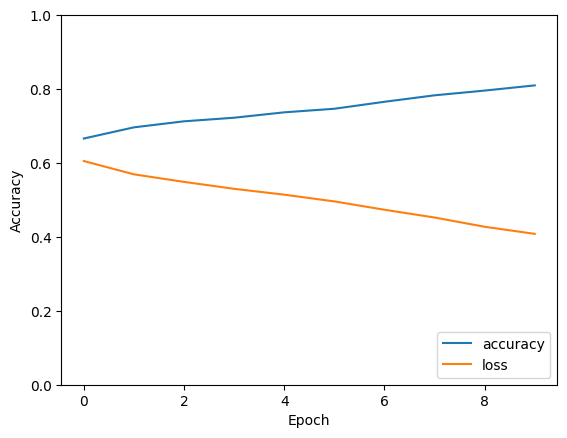

In [ ]:
# вывод точности и ошибкуи(точность - синяя, ошибка - оранжевая)
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')